# CSC345/M45: Big Data and Machine Learning 
## Coursework: Object Recognition, Cristian Sorescu 879091

In this coursework we are analysing a small image dataset from CIFAR-10, where there are 10 different categories of objects, each of which has 1000 images for training and 100 images for testing, which are stored in two 4D array. The corresponding category labels are also provided. The size of each image is fixed at 32x32x3, corresponding to height, width and colour channel respectively. An individual image only contains one object. The task is to apply supervised learning algorithms to classify the testing images into object categories. The training images will be used to train your model(s), and the testing images will be used to evaluate your model(s).

The following supervised approaches have been applied for classifier trainig:
<ul>
    <li>Linear Discriminant Analysis, as we are provided labelled data.</li>
    <li>Neural Networks, Keras and Multi-layer Perceptron</li>
</ul>

In [232]:
import numpy as np
import matplotlib.pyplot as plot
import skimage.feature
trnImages = np.load('trnImage.npy')
trnLabels = np.load('trnLabel.npy')

testImages = np.load('tstImage.npy')
testLabels = np.load('tstLabel.npy')

trnidx = 0

%matplotlib inline

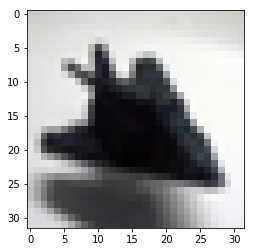

In [233]:
plot.imshow(trnImages[:,:,:,trnidx])

In [234]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

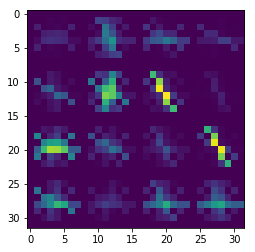

In [235]:
# Extract the features from a single image
features, hog_image = computeFeatures(trnImages[:,:,:,trnidx])

plot.imshow(hog_image)
plot.show(block=False)

# Load features

In this section I am concatenating all the features into one array for train and test data. 


In [236]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [237]:
train_features = []
test_features = []

for i in range(10000):
    train_feature, hog_image = computeFeatures(trnImages[:,:,:,i])
    train_features.extend([train_feature])
    if (i < 1000):
        test_feature, test_hog_image = computeFeatures(testImages[:,:,:,i])
        test_features.extend([test_feature])
    
train_features = np.array(train_features)
test_features = np.array(test_features)

# print(trnLabels)
# print(testLabels)

# Confusion matrix plot function definition

source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [238]:
import itertools
from sklearn.metrics import confusion_matrix

In [239]:
# source https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Target')
    plt.xlabel('Predicted')
    plt.tight_layout()

# dataset class names, names of objects 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# LDA Classification

LDA is not the best classifier, however it is a starting point giving 51.50% accuracy averaged across all 10 categories. Sole purpose of implementing this classification is for results comparison with more advanced approaches such as neural networks.

In [240]:
# Create LDA Classifier model
model = LDA(solver='lsqr', shrinkage='auto').fit(train_features, trnLabels.ravel())

# Predicted probabilities of classes for the testing set.
predictions = model.predict(test_features)

# Calculate the percentage accuracy rate on test set
accuracy = model.score(test_features, testLabels) * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 51.50%


## Compute Confusion Matrix For LDA Classifier

Confusion matrix
[[62  3  8  1  4  1  3  4 12  2]
 [ 8 51  2  2  7  1  4  3 12 10]
 [ 7  3 41  4  8 18 11  3  3  2]
 [ 1  5 15 28 14 12 16  6  1  2]
 [ 4  5  9  6 53  7  9  3  1  3]
 [ 1  4 11 10  7 50  9  7  0  1]
 [ 3  2  8  4 11 10 54  5  0  3]
 [ 0  1  4  9 13  7  2 55  3  6]
 [14 11  2  1  1  0  2  0 60  9]
 [ 3 13  1  0  6  4  0  4  8 61]]


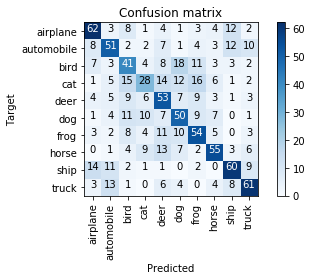

In [241]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(testLabels.ravel(), predictions)

#print(cnf_matrix)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, title='Confusion matrix')

## Neural Networks

I utilise two implementations of neural networks for results comparison.

I am using 2 hidden layer for both, Keras and MLP, with 5 and 4 neurons respectively. Why 5 and 4? It seemed reasonable to have a total sum equal to the number of selected features, 9. Furthermore, with the selected number of neurons I am getting the best results.

## 1. Keras Neural Network

First, I use tensorflow.keras in a multi-class approach on the transformed data. I will define a neural network architecture for the classification problem. I will use keras.layers to construct our architecture, and we will then bake this into a callable Model object from keras.models.

## 2. MLP Neural Network Classification

Second, I use Multi-layer Perceptron in a multi-class approach on the transformed data. I am using Adam solver which is a stochastic optimiser. Also, I used the identity activation as we compare pixel data. Alpha is 6.2, concluded from experiments to give most accurate results.

## 1. Keras Neural Network

## Dimensionality Reduction

Reduce features for neural networks. Less input layers, less neurons faster computation time.

In [242]:
# Dimensionality Reduction
model = LDA(n_components = 9)
transformed_train = model.fit_transform(train_features, trnLabels.ravel())
transformed_test = model.fit_transform(test_features, testLabels.ravel())

## Shape labels

In [243]:
number_of_classes = np.max(trnLabels) + 1

# Convert the labels to a one hot encoding
trnLabels = np.eye(number_of_classes)[trnLabels.ravel()]
testLabels = np.eye(number_of_classes)[testLabels.ravel()]

In [244]:
import tensorflow.keras as keras

In [245]:
#print(transformed_train.shape)

# Build our network architecture by stacking layers, passing the outputs from one layer into the next.

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
input_layer = keras.layers.Input(shape=(transformed_train.shape[1],))

#print(str(transformed_train.shape[1]) + "Input layers")

# Create hidden layer with 5 neurons. The input to the layer is 'input_layer'.
hidden = keras.layers.Dense(5)(input_layer)

# Create hidden layer with 4 neurons. The input to the layer is 'hidden'.
hidden = keras.layers.Dense(4)(hidden)

# Create output softmax layer to get predicted class labels.
output_layer = keras.layers.Dense(number_of_classes, activation='softmax')(hidden)

In [246]:
# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.

# Bake our architecture into a keras Model object
model = keras.models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# Fit our model to the data
model.fit(transformed_train, trnLabels, epochs=50)

# Predicted probabilities of classes for the testing set.
predictions = model.predict(transformed_test)

# Use argmax to get the predicted class label
y_pred = np.argmax(predictions, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(np.argmax(testLabels, axis=1), y_pred)) / testLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Epoch 1/50
10000/10000 [==============================] - 2s 213us/step - loss: 2.3426 2s - lo
Epoch 2/50
10000/10000 [==============================] - 1s 74us/step - loss: 2.0172
Epoch 3/50
10000/10000 [==============================] - 1s 90us/step - loss: 1.8382
Epoch 4/50
10000/10000 [==============================] - 1s 81us/step - loss: 1.7213
Epoch 5/50
10000/10000 [==============================] - 1s 86us/step - loss: 1.6480
Epoch 6/50
10000/10000 [==============================] - 1s 77us/step - loss: 1.5996
Epoch 7/50
10000/10000 [==============================] - 1s 86us/step - loss: 1.5675
Epoch 8/50
10000/10000 [==============================] - ETA: 0s - loss: 1.547 - 1s 87us/step - loss: 1.5478
Epoch 9/50
10000/10000 [==============================] - 1s 75us/step - loss: 1.5342
Epoch 10/50
10000/10000 [==============================] - 1s 68us/step - loss: 1.5245
Epoch 11/50
10000/10000 [==============================] - 1s 66us/step - loss: 1.5178
Epoch 12/50
10000/1

## Compute Confusion Matrix For Keras Neural Network Classifier

Confusion matrix
[[69  1  4  0  0  0  0  1 24  1]
 [ 3 82  0  0  0  0  3  0  8  4]
 [ 8  0 53  5  2 14  9  7  1  1]
 [ 3  1 11  6  9 30 20 15  1  4]
 [ 7  4  6  0 13  4  6 54  0  6]
 [ 0  1 18 10  0 66  4  0  1  0]
 [ 3  3  2  0  2  8 80  2  0  0]
 [ 0  0  0  1  0 20  2 41  0 36]
 [ 8 16  0  1  0  0  1  0 70  4]
 [ 0 18  0  1  1  1  2  0  8 69]]


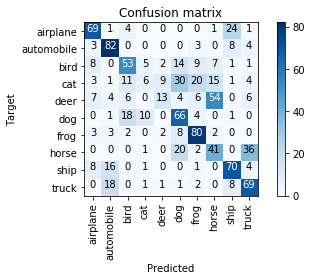

In [247]:
trnLabels = np.load('trnLabel.npy')
testLabels = np.load('tstLabel.npy')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testLabels.ravel(), predictions.argmax(axis=1))

#print(cnf_matrix)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, title='Confusion matrix')

## 2. MLP Neural Network Classification 

In [248]:
from sklearn.neural_network import MLPClassifier

In [249]:
# reload labels as they have been changed in implementations abvoe.
trnLabels = np.load('trnLabel.npy')
testLabels = np.load('tstLabel.npy')

# lda dimensionality reduction
model = LDA(n_components = 9)
transformed_train = model.fit_transform(train_features, trnLabels.ravel())
transformed_test = model.fit_transform(test_features, testLabels.ravel())

# Define MLPC model
model = MLPClassifier(activation="identity", solver='adam', alpha=6.2, hidden_layer_sizes=(5, 4), random_state=1)

# Fit our model to the data
model.fit(transformed_train, trnLabels.ravel())

# Predicted probabilities of classes for the testing set.
predictions = model.predict(transformed_test)

In [250]:
# Calculate the percentage accuracy rate on test set
accuracy = model.score(transformed_test, testLabels) * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 56.60%


## Compute Confusion Matrix For MLP Classifier

Confusion matrix
[[72  1  6  0  0  0  0  1 19  1]
 [ 4 83  0  0  0  0  3  0  7  3]
 [ 7  0 50  5  3 13 13  7  1  1]
 [ 2  1  9  7 14 27 21 14  1  4]
 [ 6  3  8  0 15  4  5 51  0  8]
 [ 0  1 14  8  0 71  4  1  1  0]
 [ 3  3  2  0  2  8 81  1  0  0]
 [ 0  0  0  1  0 18  1 45  0 35]
 [ 8 15  1  1  0  0  0  0 71  4]
 [ 0 17  1  1  0  1  2  0  7 71]]


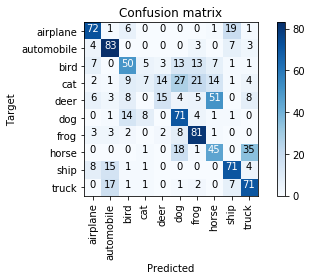

In [251]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(testLabels.ravel(), predictions)

#print(cnf_matrix)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, title='Confusion matrix')

## MLP applied on all 324 features

Percentage accuracy on testing set is: 52.30%
Confusion matrix
[[51  5  7  3  5  0  5  7 16  1]
 [ 4 58  1  4  2  2  7  7  7  8]
 [ 4  2 43  5  5 18 13  6  3  1]
 [ 0  5 13 27 13 13 19  8  1  1]
 [ 2  4 10  6 48  6 12  8  3  1]
 [ 1  4 11  7  6 52  6 11  1  1]
 [ 1  4  6  4  6  9 64  6  0  0]
 [ 0  3  5  4  8  9  3 64  1  3]
 [11 15  2  1  1  0  3  2 59  6]
 [ 0 15  0  3  6  4  1  7  7 57]]


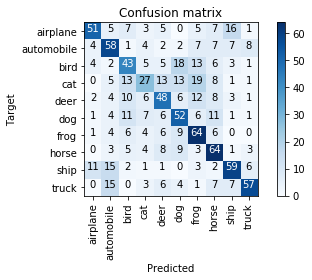

In [252]:
# Define MLPC model
model = MLPClassifier(activation="identity", solver='adam', alpha=0.3, hidden_layer_sizes=(164, 160), random_state=1)

# Fit our model to the data
model.fit(train_features, trnLabels.ravel())

# Predicted probabilities of classes for the testing set.
predictions = model.predict(test_features)

# Calculate the percentage accuracy rate on test set
accuracy = model.score(test_features, testLabels) * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

# Compute confusion matrix
cnf_matrix = confusion_matrix(testLabels.ravel(), predictions)

#print(cnf_matrix)

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names, title='Confusion matrix')